<a href="https://colab.research.google.com/github/salmanhiro/coffee-classifier/blob/main/coffee_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# gather some coffee image and manage them into directory

Mine is (on google drive, using colab as notebook)
```
[PosixPath('/content/drive/My Drive/coffee/kinds/americano'),
 PosixPath('/content/drive/My Drive/coffee/kinds/espresso'),
 PosixPath('/content/drive/My Drive/coffee/kinds/latte or cappuccino'),
 PosixPath('/content/drive/My Drive/coffee/kinds/not coffee')]
 ```

Put related images for each folder. I use a minimum of ~50 for each. 

In [ ]:
from fastai.vision import *

In [ ]:
path = Path('/content/drive/My Drive/coffee/kinds')
path.ls()

[PosixPath('/content/drive/My Drive/coffee/kinds/americano'),
 PosixPath('/content/drive/My Drive/coffee/kinds/espresso'),
 PosixPath('/content/drive/My Drive/coffee/kinds/latte or cappuccino'),
 PosixPath('/content/drive/My Drive/coffee/kinds/not coffee')]

In [ ]:
classes = ['americano','espresso','latte or cappuccino', 'not coffee']

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

americano


espresso


latte or cappuccino


not coffee


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs =4).normalize(imagenet_stats)

In [ ]:
data.classes

['americano', 'espresso', 'latte or cappuccino', 'not coffee']

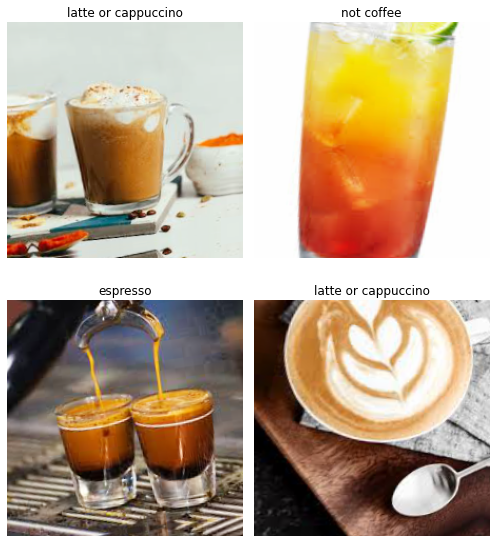

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['americano', 'espresso', 'latte or cappuccino', 'not coffee'], 4, 163, 40)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.979567,0.492514,0.125000,00:03
1,1.048345,0.905133,0.250000,00:03
2,1.173480,0.968782,0.350000,00:03
3,1.164290,1.015096,0.375000,00:03
4,1.266319,0.615538,0.300000,00:03
5,1.148798,0.873632,0.300000,00:03
6,0.922315,0.789025,0.225000,00:03
7,0.898981,0.719363,0.225000,00:03
8,0.782960,0.701836,0.200000,00:03
9,0.739200,0.641868,0.250000,00:03


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


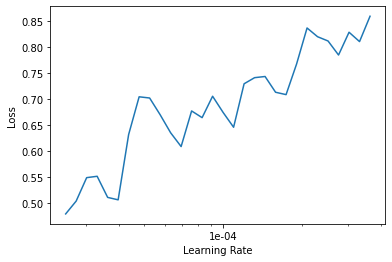

In [ ]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.695848,0.672954,0.275000,00:03
1,0.577490,0.629517,0.200000,00:03


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:
learn.save('stage-2')

# Export your model

The following cell will directly download your model as `export.pkl`, which will be used in `server.py`.

In [ ]:
learn.export()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

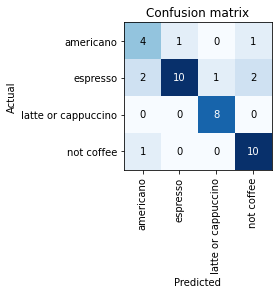

In [ ]:
interp.plot_confusion_matrix()